
## Projeto | Construido uma rede com jogos da Steam 🎮️

    
---------------------

**Equipe**


 * Letícia Coêlho Barbosa       | [Github](https://github.com/leticiacb1)
 <br>

 * Lídia Alves Chagas Domingos  | [Github](https://github.com/LidiaDomingos)
 <br>

 * Lorran Caetano Lopes         | [Github](https://github.com/lorrancmlopes)
 <br>
 
 ---------------------

* **Dataset escolhido** : [Jogos da Steam](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset)
  
  
  [Clique aqui](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset) para baixar

<br>

* **Dataset auxiliar** : [Total Revenue Empresas com Países  | Baixe AQUI](https://drive.google.com/file/d/1DUGhWPNJdPr30eo1oCH9RUPlG_FMHr3L/view?usp=sharin)

  [Clique aqui](https://vginsights.com/publishers-database) para visualizar original

### O DATASET ESCOLHIDO

-------

O contexto do projeto engloba os jogos famosos para computadores disponíveis na Steam. Atualmente, a plataforma Steam possui aproximadamente 95 milhões de usuários no mundo todo e é sucesso entre os gamers, sendo a atual líder do mercado. 


#### Principais colunas
<br>

O dataset escolhido possui 39 colunas, nesse tópico citaremos a descrições de algumas colunas de maior interesse para analise.

* **name** : nome do jogo.
<br>

* **releaseDate** : data de lançamento.
<br>

* **price** : preço do jogo.
<br>

* **metacritic_score** : media das notas dadas por avaliações de profissionais.
<br>

* **user_score** : media das notas dadas pelos usuários do jogo.
<br>

* **score_rank** : o ranke do jogo baseado nas avaliações dos usuários.
<br>

* **developers** : desenvolvedores dos jogos.
<br>

* **categories** : categoria dos jogos.
<br>

* **genres** : genero do jogo.
<br>

* **tags** : Tags do jogo.
<br>

 
 ### NOSSA REDE

-------

* **Vértices** : Jogos da Steam.
<br>

* **Arestas**  : Existe uma aresta entre um jogo 1 e um jogo 2 se o número de tags em comum entre os jogos for superior ou igual a um **threadhold** (definido mais a frente)


 ### HIPOTESE

-------


`"Quanto mais central é a sua posição na rede, maior a média de avaliações dos críticos profissionais."`
<br>

* **Variável de controle**: Tamanho da empresa.
<br>

* **Variável dependente**:  medida indicativa de centralidade do nó na rede (coreness).
<br>

* **Variável independente**: dataset[Metacritic score]



 ### MODELO

-------

` Metacrit Score ~ (Posição na Rede) + (Tamanho da Empresa) + (Ano de Lançamento) `

### ANALISANDO OS DADOS 

-------

In [1]:
# ---------------------------------
# ------------ IMPORTS ------------
# ---------------------------------

import seaborn as sns
from netpixi.integration.gt import *
from regression.integration.gt import *
import netpixi
import pandas as pd

import numpy as np
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

import cpnet
from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [2]:
# Grafo não direcional | Informação obtida via documentação
g = Graph(directed=False) 

In [3]:
# ----  Lendo o arquivo ----

df_principal = pd.read_csv('games.csv')

columns = [col for col in df_principal.columns]

print(f"\n> Colunas : {columns}\n")

print(f"\n> Tamanho do dataset : {df_principal.shape}\n")

print(f"\n> Primeiras linhas dataset : \n")
df_principal.head(2)


> Colunas : ['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies']


> Tamanho do dataset : (71716, 39)


> Primeiras linhas dataset : 



,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...




#### Descrevendo melhor a coluna Metacritic score

In [4]:
print(f"\n> Valores únicos presentes:\n\n {df_principal['Metacritic score'].unique()}\n")

print(f"\n> Distribuição dos valores :\n\n {df_principal['Metacritic score'].value_counts()}\n")

print(f"\n> Descrição:\n\n{df_principal['Metacritic score'].describe()}\n")


> Valores únicos presentes:

 [ 0 62 64 53 84 89 70 86 40 87 92 76 51 49 81 69 72 68 52 82 59 77 79 71
 74 73 88 47 75 66 50 63 67 80 58 90 39 78 55 85 65 91 83 57 56 44 60 61
 48 46 23 45 94 27 38 30 35 54 41 43 32 34 93 37 36 95 42 29 24 96 20 33
 97]


> Distribuição dos valores :

 0     67938
80      183
77      165
76      164
78      161
      ...  
23        1
27        1
24        1
20        1
33        1
Name: Metacritic score, Length: 73, dtype: int64


> Descrição:

count    71716.000000
mean         3.834207
std         16.437707
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         97.000000
Name: Metacritic score, dtype: float64



### LIMPANDO DATASET

-------

In [5]:
# ---- Retirando alguns valores nulos ----

df_principal.dropna(subset=['Tags', 'Metacritic score'], inplace=True)
df_principal = df_principal[df_principal['Metacritic score'] != 0]


# ---- AMOSTRAGEM para anos > 2019 e < 2023 ----

df_principal = df_principal[ df_principal["Release date"].map(lambda date: 
                                                              ((int(date.split(' ')[-1]) > 2020) and 
                                                               int(date.split(' ')[-1]) < 2023))== True]
df_principal.reset_index(inplace=True, drop=True)

# Adicionando coluna ReleaseYear
df_principal["ReleaseYear"] = df_principal["Release date"].map(lambda date: (int(date.split(' ')[-1])))

print(f"\n> Tamanho do dataset pós limpeza:\n {df_principal.shape}\n")

print(f"\n> Descrição coluna Metacritic score:\n\n {df_principal['Metacritic score'].describe()}\n")


> Tamanho do dataset pós limpeza:
 (299, 40)


> Descrição coluna Metacritic score:

 count    299.000000
mean      76.963211
std        7.544186
min       48.000000
25%       73.000000
50%       78.000000
75%       82.000000
max       97.000000
Name: Metacritic score, dtype: float64



In [6]:
df_principal.head(2)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,ReleaseYear
0,1345820,Ragnarock,"Jul 15, 2021",50000 - 100000,44,0,16.24,17,Are you ready to rock? Ragnarock is a solo/mul...,"['English', 'French', 'Italian', 'German', 'Sp...",...,281,0,WanadevStudio,WanadevStudio,"Single-player,Multi-player,PvP,Online PvP,Stea...","Casual,Indie,Racing,Sports","Rhythm,VR,Multiplayer,Music,Racing,PvP,Casual,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021
1,821880,Idol Manager,"Jul 26, 2021",100000 - 200000,102,0,19.99,0,You take on the role of manager at a small (bu...,"['English', 'Japanese', 'Russian', 'Simplified...",...,853,0,Glitch Pitch,PLAYISM,"Single-player,Steam Achievements,Steam Worksho...","Indie,Simulation,Strategy","Management,Simulation,Anime,Sexual Content,Str...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021


### ADICIONANDO DATASET AUXILIAR

---

In [9]:
df_total_revenue = pd.read_csv('total_revenue_and_country.csv')
df_total_revenue = df_total_revenue.drop_duplicates()

df_total_revenue.head()

,Name,Total revenue,Country
0,Ubisoft,2500000000.0,France
1,Valve,2400000000.0,United States
2,2K,2300000000.0,United States
3,Electronic Arts,2100000000.0,United States
4,SEGA,2100000000.0,Japan


In [10]:
ausentes = []
presentes = []

# Verificando se cada valor da coluna do df1 está presente no df2
for publi in df_principal['Publishers'].tolist():
    if publi.lower() not in [name.lower() for name in df_total_revenue["Name"].tolist()]:
        if publi.lower() not in [name.lower() for name in ausentes]:
            print(publi)
            ausentes.append(publi)
    else:
        if publi.lower() not in [name.lower() for name in presentes]:
            presentes.append(publi)   

Worldwalker Games LLC,WhisperGames
Running With Scissors,Hyperstrange
Mixed Realms Pte Ltd,Coconut Island Games
Humble Games,WhisperGames
Foreign Gnomes,Surefire.Games
Digixart,Ravenscourt
United Label,CI Games
Merge Games,Maple Whispering Limited
EXOR Studios,Surefire.Games
META Publishing,Owlcat Games
Modern Wolf,Fractale,WhisperGames
FromSoftware Inc.,Bandai Namco Entertainment
Games Operators,Modus Games
Assemble Entertainment,WhisperGames,Mayflower Entertainment
DANGEN Entertainment,Gamera Games,Intragames
SEGA,Feral Interactive
Fishing Cactus,PID Games,2PGames
Sneaky Yak Studio,WhisperGames
Movie Games S.A.,HeartBeat Games
XSEED Games,Marvelous USA, Inc.,Marvelous
Canada Media Fund,Ontario Creates,The Games Institute
JanduSoft,Game Seer Ventures
M-Theory,Oddboy
Ravenscourt,Maple Whispering Limited
Warner Bros. Games,Warner Bros. Interactive Entertainment
Future Friends Games,StudioInkyfox
Whitethorn Games,Gamious
Rose City Games,wiip
Freedom Games,Maple Whispering Limited
Maze Th

#### Vamos considerar que, quando há mais de um publisher por jogo, o valor a ser inserido na nova coluna "Total revenue" será a soma do total revenue de cada publisher.

In [11]:
df_total_revenue.head(2)

,Name,Total revenue,Country
0,Ubisoft,2500000000.0,France
1,Valve,2400000000.0,United States


In [12]:
# Verificar se cada valor da coluna 'Publishers' do df_principal está presente no df_total_revenue
for index, row in df_principal.iterrows():
    publishers = row['Publishers']
    total_revenue = 0
    countries = []
    
    # Verificar se o valor de 'publishers' está presente na coluna 'Name' do df_total_revenue
    for name in publishers.split(','):
        mask = df_total_revenue['Name'].str.lower() == name.lower().strip()
        revenue = df_total_revenue.loc[mask, 'Total revenue']
        
        # Converter os valores de 'revenue' para o tipo numérico
        revenue = pd.to_numeric(revenue, errors='coerce')
        revenue = revenue.sum()
        total_revenue += revenue
        
        #Casos com virgula no nome
        if (name == "CAPCOM Co." or name == "KRAFTON" or name == "KOEI TECMO GAMES CO." or name == "GameTomo Co." or name =="Ocean Drive Studio") and (len(publishers.split(','))==2):
            mask = df_total_revenue['Name'].str.lower() == publishers.lower().strip()
            country = ', '.join(df_total_revenue.loc[mask, 'Country'])
            countries.append(country)
            break
            
        country = ', '.join(df_total_revenue.loc[mask, 'Country'])
        countries.append(country)

    # Inserir o valor total de receita na coluna 'Total revenue' do df_principal
    df_principal.at[index, 'Total revenue'] = total_revenue
    
    # Inserir a string de países no df_principal
    df_principal.at[index, 'Country'] = ', '.join(countries)

#### Fazendo uma verificação com um caso que tem 2 publishers
* `Considerações` : Para o caso em que temos 2 ou mais publishers , o Total revenue foi calculado com a soma do revenue individual desses publishers.

In [13]:
df_principal.iloc[8]["Total revenue"]

35200000.0

In [14]:
df_total_revenue.loc[df_total_revenue["Name"]=="Hyperstrange"]

,Name,Total revenue,Country
265,Hyperstrange,6300000.0,Poland


In [15]:
df_total_revenue.loc[df_total_revenue["Name"]=="Running With Scissors"]

,Name,Total revenue,Country
210,Running With Scissors,28900000.0,United States


In [16]:
(6300000.0+28900000.0)

35200000.0

In [17]:
df_principal.iloc[8]["Country"]

'United States, Poland'

### Tags

-------

In [18]:
# ---- Tranforma a coluna de Tags em lista ----

df_principal['Tags'] = df_principal.Tags.apply(lambda x: str(x).split(','))
print(f"\n> dataset[Tags] como lista:\n\n{df_principal['Tags']}")



> dataset[Tags] como lista:

0      [Rhythm, VR, Multiplayer, Music, Racing, PvP, ...
1      [Management, Simulation, Anime, Sexual Content...
2      [Casual, Simulation, Strategy, Indie, Manageme...
3      [Puzzle, Difficult, Indie, Singleplayer, Sokob...
4      [RPG, Choices Matter, Story Rich, Detective, T...
                             ...                        
294    [Strategy, Post-apocalyptic, Survival, Colony ...
295    [Atmospheric, Resource Management, Simulation,...
296    [Metroidvania, Female Protagonist, Shoot 'Em U...
297    [Colony Sim, Indie, Pixel Graphics, Simulation...
298    [Indie, Rhythm, Action, Hand-drawn, Colorful, ...
Name: Tags, Length: 299, dtype: object


### Montando os Nós da Rede

-------

In [19]:
id = 0
unique_name_values = df_principal['Name'].unique().tolist()
node_data = []

for _ , linha in  df_principal.iterrows():
    
    if(linha['Name'] in unique_name_values):
        node_data.append([id ,linha['Tags'], linha['Metacritic score'] ,  linha['Publishers'], linha['Total revenue'], linha['ReleaseYear'] , linha['Country']])
        id+=1

df_nodes = pd.DataFrame(node_data,columns=['id','Tags', 'MetacriticScore' , 'Publishers' , 'TotalRevenue' , 'ReleaseYear' , 'Country']) 
df_nodes

,id,Tags,MetacriticScore,Publishers,TotalRevenue,ReleaseYear,Country
0,0,"[Rhythm, VR, Multiplayer, Music, Racing, PvP, ...",87,WanadevStudio,1200000.0,2021,France
1,1,"[Management, Simulation, Anime, Sexual Content...",73,PLAYISM,58600000.0,2021,Japan
2,2,"[Casual, Simulation, Strategy, Indie, Manageme...",87,Dinosaur Polo Club,9100000.0,2021,New Zealand
3,3,"[Puzzle, Difficult, Indie, Singleplayer, Sokob...",76,Mischka Kamener,0.0,2021,Australia
4,4,"[RPG, Choices Matter, Story Rich, Detective, T...",67,Fireshine Games,26400000.0,2021,United Kingdom
...,...,...,...,...,...,...,...
294,294,"[Strategy, Post-apocalyptic, Survival, Colony ...",76,Ravenscourt,10400000.0,2022,Germany
295,295,"[Atmospheric, Resource Management, Simulation,...",78,Raw Fury,45400000.0,2022,Sweden
296,296,"[Metroidvania, Female Protagonist, Shoot 'Em U...",82,Team17,223800000.0,2022,United Kingdom
297,297,"[Colony Sim, Indie, Pixel Graphics, Simulation...",93,Kitfox Games,21400000.0,2022,Canada


In [20]:
# ---- Criando os nós e adiciona atributos aos nós ----

g.add_vp('MetacriticScore')

aux = []
for _, infos in df_nodes.iterrows():
    
    #Adiciona vértices:
    infos = infos.astype(object)
    g.add_vertex(infos['id'])
    
    # Adiciona atributos:
    vertice = g.get_vertex(infos['id'])
    vertice['MetacriticScore'] = infos['MetacriticScore']

### Montando as Arestas da Rede

-------

In [21]:
def count_tags(lista_tags_1, lista_tags_2):
    '''
    Retorna o número de tags em comum entre duas listas
    '''    
    count_common_tags = 0
        
    for tag1 in lista_tags_1:
        for tag2 in lista_tags_2:
            
            if(tag1 == tag2):
                count_common_tags+=1
    
    return count_common_tags

In [22]:
node_relation = set()
data_relation = set()

for _, linha1 in df_nodes.iterrows():
    for _,linha2 in df_nodes.iterrows():
        
        proximidade = 0
        
        if(( (linha1['id'] , linha2['id']) not in node_relation) and 
           ( (linha2['id'] , linha1['id']) not in node_relation) and (linha2['id'] != linha1['id'])):
            
            # Calculando TAGS em comum
            proximidade = count_tags(linha1['Tags'], linha2['Tags'])
            
            # Adiciona valor na relação de nós:
            node_relation.add((linha1['id'] , linha2['id']))
        
            data_relation.add((linha1['id'], linha2['id'], proximidade))
            
df_relation = pd.DataFrame(data_relation,columns=['node_1', 'node_2' , 'Tags_em_Comum'] ) 
df_relation

,node_1,node_2,Tags_em_Comum
0,91,205,9
1,42,287,2
2,148,199,1
3,103,166,5
4,107,236,5
...,...,...,...
44546,18,267,1
44547,132,231,1
44548,104,187,4
44549,88,98,3


#### Threadhold para a construção das Arestas

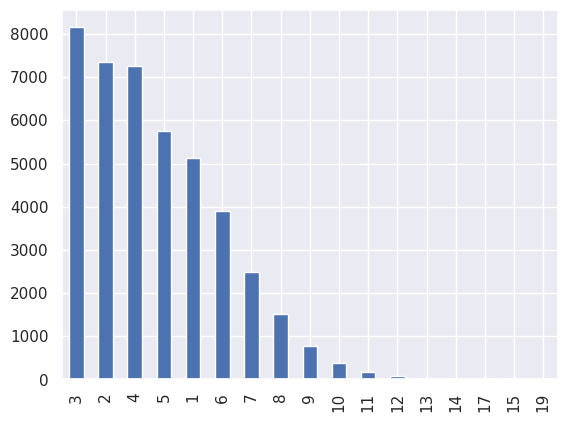

In [23]:
df_relation['Tags_em_Comum'][df_relation['Tags_em_Comum'] != 0].value_counts().plot(kind='bar');

In [24]:
# ---- Escolhendo threshold para a criação das arestas a depender da distribuição ----

list_num_tags = df_relation['Tags_em_Comum'][df_relation['Tags_em_Comum'] != 0].value_counts().index
lista_num_jogos = df_relation['Tags_em_Comum'][df_relation['Tags_em_Comum'] != 0].value_counts().values

def media_ponderada(lista_pesos , lista_valor):
    
    nominador = 0
    denominador = sum(lista_pesos)
    
    for num_tags , num_jogos in zip(list_num_tags , lista_num_jogos):
        nominador += num_tags*num_jogos
        
    return nominador/denominador
        
threshold_proximidade = media_ponderada(lista_num_jogos , list_num_tags)

print(f"\n> Threshold num_tags para arestas :  {round(threshold_proximidade)}\n")


> Threshold num_tags para arestas :  4



In [25]:
# ---- Criando arestas ----

for _ , relacao in df_relation.iterrows():
    
    if(relacao['Tags_em_Comum'] > threshold_proximidade):
        g.add_edge(relacao['node_1'], relacao['node_2'])

### Métricas da Rede

-------

In [26]:
# ---- Número de arestas, nós e densidade ----

n = g.num_vertices()
m = g.num_edges()

if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
d = m / max_edges

print('\n > Número de vértices de g:', n )
print('\n > Número de arestas de g:', m)
print('\n > Densidade:', d)


 > Número de vértices de g: 299

 > Número de arestas de g: 22331

 > Densidade: 0.5012457632825301


### Calculando Degree

-------

In [27]:
# Propriedade dos vértices
data = gt_data(g)

# Calculando degrees
in_degrees = []
out_degrees = []
degrees = []

for v in g.all_vertices():
    in_degrees.append(v.in_degree())
for v in g.all_vertices():
    out_degrees.append(v.out_degree())
for v in g.all_vertices():
    degrees.append(v.total_degree())
    
data['in_degree'] = in_degrees
data['out_degree'] = out_degrees
data['degree'] = degrees
data['degree'].describe()

count    299.000000
mean     149.371237
std       53.975628
min        2.000000
25%      108.000000
50%      159.000000
75%      193.500000
max      252.000000
Name: degree, dtype: float64

<AxesSubplot: xlabel='degree', ylabel='Count'>

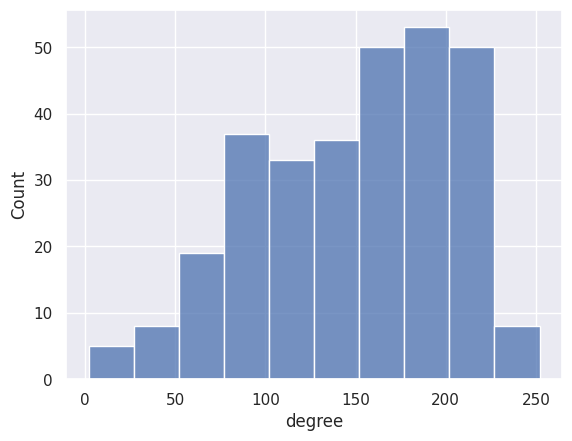

In [28]:
sns.histplot(data['degree'])

### Grafo

-------

In [29]:
# ----- Salva e renderiza grafo -----
gt_save(g, 'projeto.net.gz')

r = netpixi.render('/projeto.net.gz')

In [30]:
# ----- Algoritmo Reingold Fruchterm -----
m = gt_draw.fruchterman_reingold_layout(g)
gt_move(g, m)
gt_save(g, 'projeto_frunch.net.gz')
r = netpixi.render('projeto_frunch.net.gz');

In [ ]:
lista_int_coreness = []
lista_float_coreness = []

# Adiciona propriedades ao nó
g.add_vp('core')
g.add_vp('coreness')

# ---- Funções ----

def surprise():
    matrix = spectral.adjacency(g)
    algorithm = cpnet.Surprise()
    algorithm.detect(matrix)
    return algorithm.get_coreness()

def rombach():
    matrix = spectral.adjacency(g)
    algorithm = cpnet.Rombach()
    algorithm.detect(matrix)
    return algorithm.get_coreness()

# ---- Roda Algorítimo ----
c_core = surprise()
c_coreness = rombach()


for i, coreness in c_core.items():
    v = g.get_vertex_by_index(i)
    v['core'] = int(coreness)
    lista_int_coreness.append(int(coreness))
df_nodes['core'] = lista_int_coreness

for i, coreness in c_coreness.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = float(coreness)
    lista_float_coreness.append(float(coreness))
df_nodes['coreness'] = lista_float_coreness


# ---- Modifica cor ----
for v in g.all_vertices():
    if v['core'] == 1:
        r.vertex(v['id'], color=0xff0000)
    else:
        r.vertex(v['id'], color=0x00ff00)
        
# ---- Modifica tamanho ----

for v in g.all_vertices():
    r.vertex(v['id'], size=(10 + 40 * v['coreness']))
    r.vertex(v['MetacriticScore'], color=0xff0000)    

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


### Regressão Linear

-------

In [45]:
# Nodes
df_nodes.head(2)

,id,Tags,MetacriticScore,Publishers,TotalRevenue,ReleaseYear,Country,core,coreness
0,0,"[Rhythm, VR, Multiplayer, Music, Racing, PvP, ...",87,WanadevStudio,1200000.0,2021,France,0,0.100418
1,1,"[Management, Simulation, Anime, Sexual Content...",73,PLAYISM,58600000.0,2021,Japan,0,0.059623


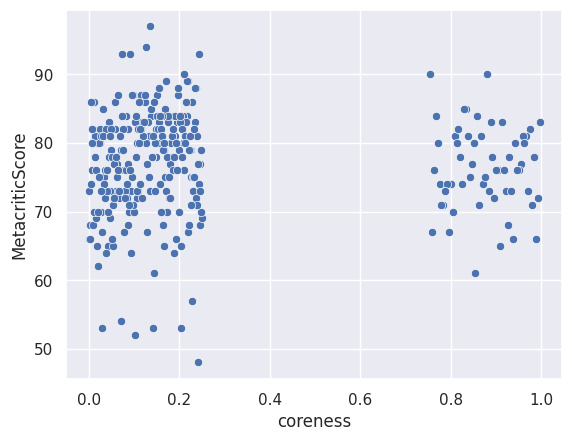

In [46]:
sns.scatterplot(x=df_nodes['coreness'], y=df_nodes['MetacriticScore']);

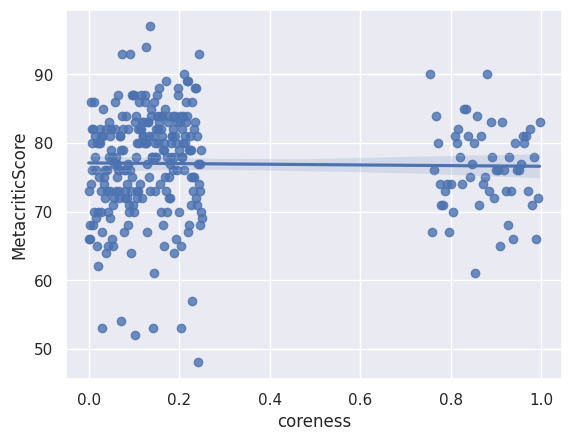

In [47]:
sns.regplot(x=df_nodes['coreness'], y=df_nodes['MetacriticScore']);

In [48]:
result = reg.linear(data=df_nodes, formula="MetacriticScore ~ coreness + ReleaseYear + TotalRevenue")

In [49]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MetacriticScore   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     6.977
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           0.000150
Time:                        01:09:49   Log-Likelihood:                -1017.7
No. Observations:                 299   AIC:                             2043.
Df Residuals:                     295   BIC:                             2058.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2791.8515   1989.756     -1.403      0.162   -6707.767    1124.064
coreness        -0.1785      1.396     -0.128      0.898      -2.925       2.568
ReleaseYear      1.4190      0.984      1.441      0.151      -0.518       3.356
TotalRevenue  3.837e-09   9.19e-10      4.173      0.000    2.03e-09    5.65e-09
==============================================================================
Omnibus:                       35.179   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.441
Skew:                          -0.775   Prob(JB):                     1.84e-11
Kurtosis:                       4.251   Cond. No.                     2.34e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
result.micro_summary()

variable,coefficient,std error,p-value
coreness,-0.178541,1.395617,0.898292
ReleaseYear,1.419000,0.984394,0.150505
TotalRevenue,0.000000,0.000000,0.000040


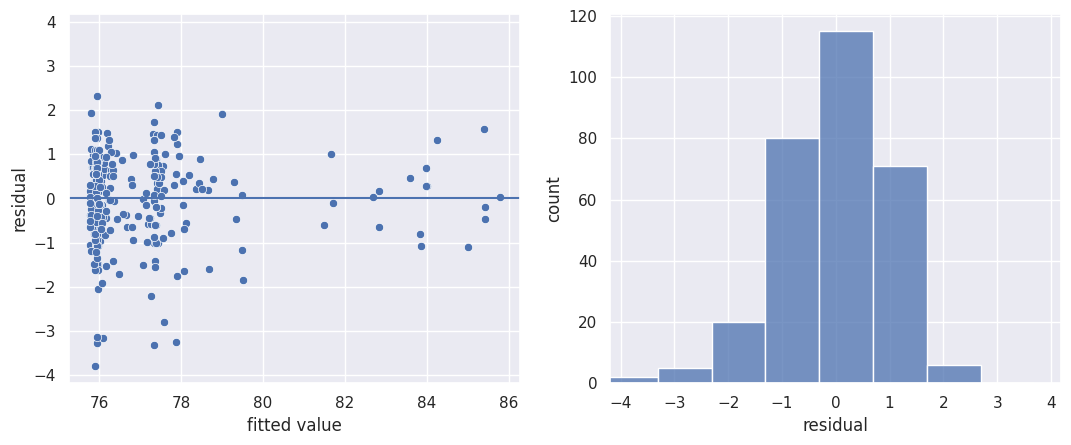

In [52]:
result.plot_residuals()

In [53]:
# Observa-se um treshold de divisão no coreness, dessa forma, podemos dividir esses dados em dois conjuntos
# E assim aplicar uma regressão em cada metade.

threshold_coreness = 0.5

df_nodes_periferia = df_nodes[df_nodes['coreness'] < threshold_coreness]
df_nodes_centro =  df_nodes[df_nodes['coreness'] > threshold_coreness]

In [54]:
df_nodes_periferia.head(2)

,id,Tags,MetacriticScore,Publishers,TotalRevenue,ReleaseYear,Country,core,coreness
0,0,"[Rhythm, VR, Multiplayer, Music, Racing, PvP, ...",87,WanadevStudio,1200000.0,2021,France,0,0.100418
1,1,"[Management, Simulation, Anime, Sexual Content...",73,PLAYISM,58600000.0,2021,Japan,0,0.059623


In [55]:
df_nodes_centro.head(2)

,id,Tags,MetacriticScore,Publishers,TotalRevenue,ReleaseYear,Country,core,coreness
4,4,"[RPG, Choices Matter, Story Rich, Detective, T...",67,Fireshine Games,26400000.0,2021,United Kingdom,1,0.758333
13,13,"[RPG, Adventure, Female Protagonist, JRPG, Act...",74,Modus Games,17300000.0,2021,United States,1,0.870833


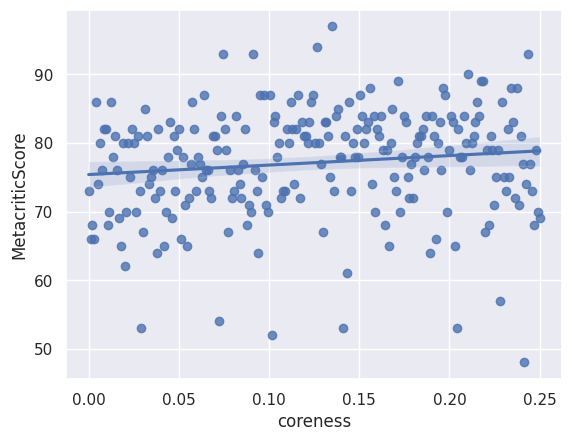

In [56]:
# ------- Para a periferia  -------

sns.regplot(x=df_nodes_periferia['coreness'], y=df_nodes_periferia['MetacriticScore']);

In [57]:
result_periferia = reg.linear(data=df_nodes_periferia, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')

In [60]:
result_periferia.micro_summary()

variable,coefficient,std error,p-value
coreness,14.851983,6.710640,0.027841
ReleaseYear,1.901945,1.081779,0.080016
TotalRevenue,0.000000,0.000000,0.000065


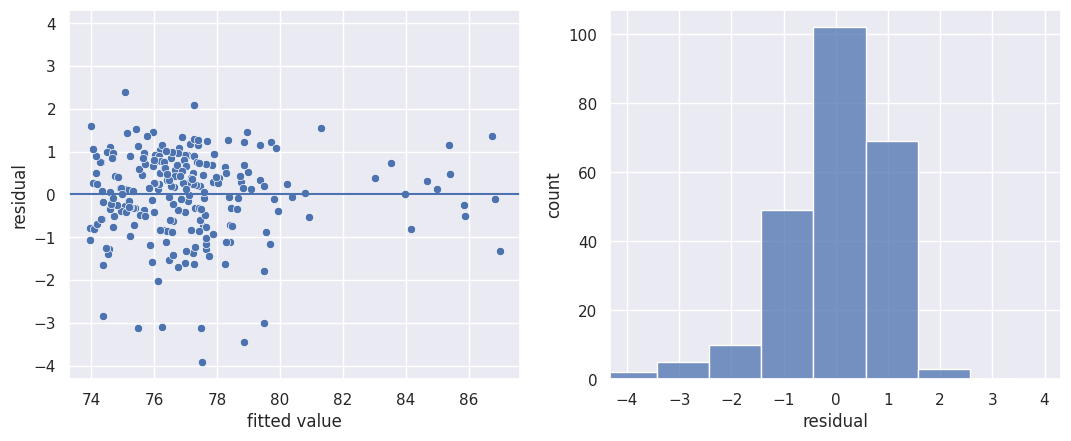

In [61]:
result_periferia.plot_residuals()

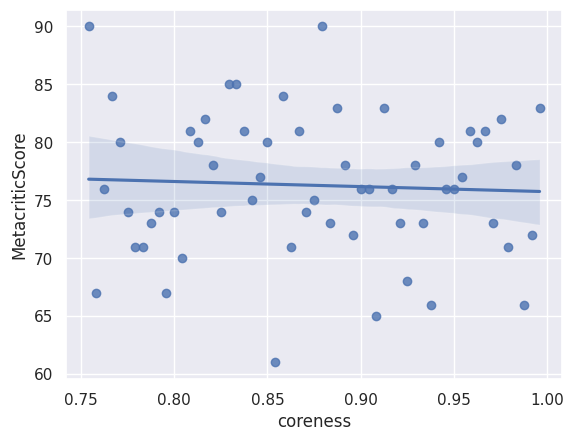

In [62]:
# ------- Para o centro -------

sns.regplot(x=df_nodes_centro['coreness'], y=df_nodes_centro['MetacriticScore']);

In [63]:
result_centro = reg.linear(data=df_nodes_centro, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')

In [67]:
result_centro.micro_summary()

variable,coefficient,std error,p-value
coreness,-8.793301,11.712552,0.455998
ReleaseYear,-1.939781,2.326164,0.407946
TotalRevenue,0.000000,0.000000,0.271462


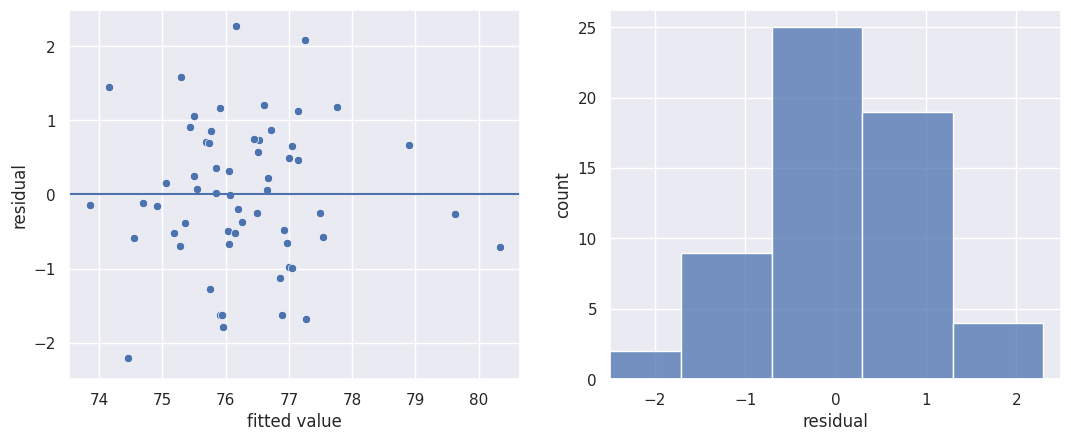

In [68]:
result_centro.plot_residuals()

### Recortes | Por Região

* Considerações : Caso um jogo possua dois ou mais Publishers em regiões diferentes, esse dado (jogo) é pertencente as condições de recorte de "todos os países de seus publisher".

In [69]:
# ---- Dicionario com Países e Regiões ----
country_and_regions = {
"North_Africa" : ["Bahrain",  "Egypt", "Jordan",  "Kuwait",  "Lebanon", "Mauritania",
"Morocco",  "Oman",  "Pakistan", "Qatar",  "Saudi Arabia", "Tunisia", "United Arab Emirates"],

"Latin_America" : ["Argentina" , "Bahamas"  , "Belize" , "Bermuda" , "Bolivia" , "Brazil" , "Chile" ,
"Colombia" , "Costa Rica" , "Dominican Republic" ,  "Ecuador",  "El Salvador", "Guatemala",
"Honduras", "Mexico", "Panama", "Paraguay", "Peru" , "Suriname" , "Trinidad and Tobago" , "Uruguay"],

"North_America" : ["Canada" , "United States"],

"Europe" : ["Armenia", "Austria", "Belgium" , "Bulgaria" , "Croatia" , "Cyprus" , "Czech Republic",
"Denmark", "Estonia" , "Finland", "France" , "Georgia" , "Germany", "Greece", "Hungary",
"Iceland","Ireland" , "Israel" , "Italy", "Kazakhstan", "Kyrgyz Republic",
"Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco",
"Montenegro", "Netherlands" , "North Macedonia" , "Norway", "Poland", "Portugal", "Romania",
"Russia", "Serbia, The Republic of", "Slovak Republic" , "Slovenia",
"Spain", "Sweden", "Switzerland", "Turkey" , "Ukraine" , "United Kingdom", "England" , "Serbia"],

"Asia" : ["Australia" , "Bangladesh", "Bhutan" , "Fiji" , "India" , "Japan" , "Maldives" , "Marshall Islands",
"Micronesia" , "Mongolia" , "Nepal" , "New Zealand", "Palau" ,"Philippines" , "Republic of Korea" , "Sri Lanka",
"Taiwan Partnership" , "Thailand" , "Vietnam" , "China", "Taiwan" , "Malaysia", "South Korea"],

"Africa" : ["Benin" , "Botswana" , "Burkina Faso" , "Cameroon" , "Cape Verde" , "Chad" , "Congo, The Republic of" , "Ethiopia" , "Gabon",
"Gambia" , "Ghana" , "Guinea" , "Kenya" , "Liberia" , "Madagascar" , "Mali" , "Mauritius" , "Namibia" , "Niger" , "Nigeria" , "Rwanda",
"Senegal", "Seychelles" , "South Africa" , "Tanzania" , "Togo" , "Uganda"]
}

In [70]:
df_nodes.head(2)

,id,Tags,MetacriticScore,Publishers,TotalRevenue,ReleaseYear,Country,core,coreness
0,0,"[Rhythm, VR, Multiplayer, Music, Racing, PvP, ...",87,WanadevStudio,1200000.0,2021,France,0,0.100418
1,1,"[Management, Simulation, Anime, Sexual Content...",73,PLAYISM,58600000.0,2021,Japan,0,0.059623


In [71]:
# ------ Região do Publisher ------

list_regions = []
list_NAN = []
count_NAN = 0
for idx , linha in df_nodes.iterrows():
    
    # Lista auxiliar para mais de 1 país
    aux_list = set()
    
    # País ou países ?
    country = linha['Country'].strip()
    
    # Lista de Países
    country_list = country.split(",")
    country_list = [country.strip() for country in country_list]
    
    achou_regiao = False
    for key, values in country_and_regions.items():
        
        if(len(country_list) == 1):
            if(country in values):
                list_regions.append(key)
                achou_regiao  = True
                break
        else: 
            for c in country_list:
                if(c in values): 
                    if key not in aux_list:
                        aux_list.add(key)
                        achou_regiao  = True
    
    # Adiciona lista auxiliar na lista de região
    if(len(country_list) > 1):
        
        if(len(aux_list) >= 1):
            list_regions.append(list(aux_list))
        else:
            print(f" * Lista auxiliar vazia para : {country_list} , idx = {idx}")
    
    if not achou_regiao : 
        list_NAN.append(country)
        list_regions.append("NaN")
        count_NAN+=1
            
print(f"\n> Lista de Regiões : {list_regions}\n")
print(f"\n> Países identificados como NaN : {list_NAN}\n")
print(f"\n> Quantidade de NaN : {count_NAN}\n")

# Adiciona coluna extra:
df_nodes['Region'] = list_regions
df_nodes.head(3)


> Lista de Regiões : ['Europe', 'Asia', 'Asia', 'Asia', 'Europe', 'North_America', ['North_America', 'Asia'], 'North_America', ['North_America', 'Europe'], 'Europe', 'Asia', 'North_America', ['Asia'], 'North_America', 'Europe', ['Asia'], 'North_America', 'Europe', 'Europe', ['North_America', 'Asia'], 'North_America', 'Europe', 'Asia', 'Asia', 'North_America', 'Latin_America', ['Asia', 'Europe'], 'Europe', 'Asia', 'Europe', 'North_America', 'Europe', 'North_America', 'Asia', 'Europe', ['Europe'], 'Europe', 'Europe', 'North_America', 'Europe', 'North_America', 'North_America', 'Asia', 'Europe', 'Asia', 'Europe', 'Europe', 'North_America', 'Europe', 'Asia', 'North_America', 'North_America', 'Europe', 'Europe', 'North_America', 'North_America', 'Europe', 'Asia', 'Asia', 'Europe', 'Europe', 'Europe', 'North_America', 'Asia', 'Asia', 'North_America', 'Europe', ['Europe'], 'Europe', 'Europe', 'Europe', 'Europe', 'North_America', 'Europe', 'Europe', 'North_America', 'Europe', 'Europe', 'Europ

,id,Tags,MetacriticScore,Publishers,TotalRevenue,ReleaseYear,Country,core,coreness,Region
0,0,"[Rhythm, VR, Multiplayer, Music, Racing, PvP, ...",87,WanadevStudio,1200000.0,2021,France,0,0.100418,Europe
1,1,"[Management, Simulation, Anime, Sexual Content...",73,PLAYISM,58600000.0,2021,Japan,0,0.059623,Asia
2,2,"[Casual, Simulation, Strategy, Indie, Manageme...",87,Dinosaur Polo Club,9100000.0,2021,New Zealand,0,0.097280,Asia


### Pegando dados por Região

In [137]:
def filter_region(region, region_filter):
        
    if isinstance(region, list):
        
        for c in region: 
            if(c in region_filter):
                return True
    
    if(region in region_filter):
        return True
        
    return False

# Seleciona apenas dados relevantes - North America
df_nodes_NorthAmerica =df_nodes[df_nodes['Region'].apply(filter_region , region_filter = ['North_America']) == True]

# Seleciona apenas dados relevantes - Asia
df_nodes_Asia = df_nodes[df_nodes['Region'].apply(filter_region , region_filter = ['Asia']) == True]

# Seleciona apenas dados relevantes - Europe
df_nodes_Europa = df_nodes[df_nodes['Region'].apply(filter_region , region_filter = ['Europe']) == True]

# Seleciona apenas América do Norte e Europa
df_nodes_Europa_e_America_Norte = df_nodes[df_nodes['Region'].apply(filter_region , region_filter = ['North_America', 'Europe']) == True]

# Seleciona Europa + todo o resto exceto América do Norte
df_nodes_TUDO_EXC_America_Norte = df_nodes[df_nodes['Region'].apply(filter_region , region_filter = ['Europe', 'Asia', 'Latin_America', 'Africa']) == True]

# Seleciona América do Norte + todo o resto exceto Europa
df_nodes_TUDO_EXC_Europa = df_nodes[df_nodes['Region'].apply(filter_region , region_filter = ['North_America', 'Asia', 'Latin_America', 'Africa']) == True]

# Seleciona tudo exceto América do Norte + Europa
df_nodes_TUDO_EXC_Europa_e_Norte = df_nodes[df_nodes['Region'].apply(filter_region , region_filter = ['Asia', 'Latin_America', 'Africa']) == True]

In [138]:
# Confirma valores obtidos:

print(f"\n> North America :  {list(df_nodes_NorthAmerica['Region'])}\n")

print(f"\n> Asia          :  {list(df_nodes_Asia['Region'])}\n")

print(f"\n> Europe        :  {list(df_nodes_Europa['Region'])}\n")

print(f"\n> North America e Europe        :  {list(df_nodes_Europa_e_America_Norte['Region'])}\n")

print(f"\n> Europa + todo o resto exceto América do Norte        :  {list(df_nodes_TUDO_EXC_America_Norte['Region'])}\n")

print(f"\n> América do Norte + todo o resto exceto Europa        :  {list(df_nodes_TUDO_EXC_Europa['Region'])}\n")

print(f"\n> tudo exceto América do Norte + Europa        :  {list(df_nodes_TUDO_EXC_Europa_e_Norte['Region'])}\n")




> North America :  ['North_America', ['North_America', 'Asia'], 'North_America', ['North_America', 'Europe'], 'North_America', 'North_America', 'North_America', ['North_America', 'Asia'], 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', ['North_America', 'Asia', 'Europe'], 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', ['North_America', 'Europe'], 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America', 'North_America

####  North America 

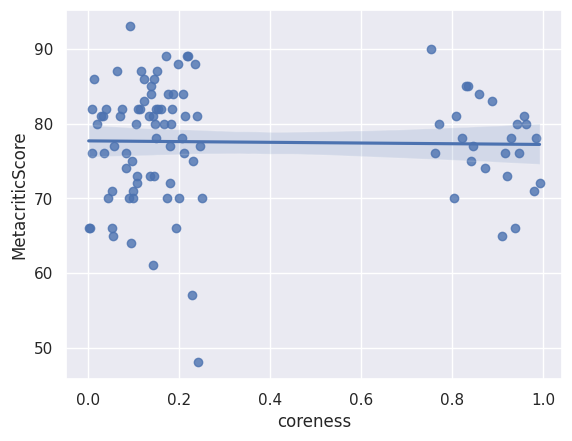

In [74]:
sns.regplot(x=df_nodes_NorthAmerica['coreness'], y=df_nodes_NorthAmerica['MetacriticScore']);

In [75]:
result_NorthAmerica= reg.linear(data=df_nodes_NorthAmerica, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')

In [76]:
result_NorthAmerica.micro_summary()

variable,coefficient,std error,p-value
coreness,0.221110,2.348639,0.925195
ReleaseYear,0.588116,1.702441,0.730525
TotalRevenue,0.000000,0.000000,0.017427


In [77]:
df_nodes_NorthAmerica_periferia = df_nodes_NorthAmerica[df_nodes_NorthAmerica['coreness'] < threshold_coreness]
df_nodes_NorthAmerica_centro =  df_nodes_NorthAmerica[df_nodes_NorthAmerica['coreness'] > threshold_coreness]

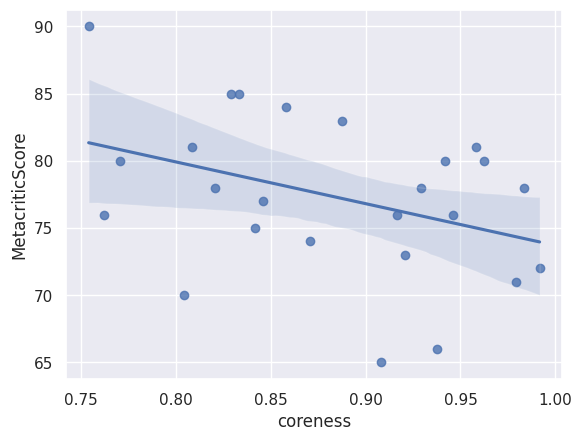

In [78]:
# ------- Para o centro -------

sns.regplot(x=df_nodes_NorthAmerica_centro['coreness'], y=df_nodes_NorthAmerica_centro['MetacriticScore']);

In [79]:
result_centro_NorthAmerica = reg.linear(data=df_nodes_NorthAmerica_centro, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')
result_centro_NorthAmerica.micro_summary()

variable,coefficient,std error,p-value
coreness,-36.482798,16.297377,0.036144
ReleaseYear,2.444439,3.066115,0.434232
TotalRevenue,0.000000,0.000000,0.263179


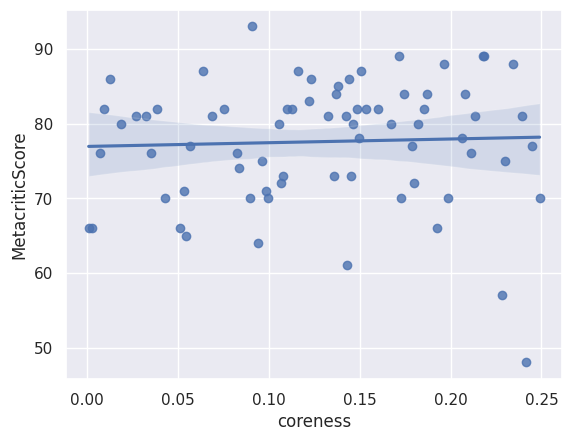

In [80]:
# ------- Para preiferia -------

sns.regplot(x=df_nodes_NorthAmerica_periferia['coreness'], y=df_nodes_NorthAmerica_periferia['MetacriticScore']);

In [82]:
result_periferia_NorthAmerica = reg.linear(data=df_nodes_NorthAmerica_periferia, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')
result_periferia_NorthAmerica.micro_summary()

variable,coefficient,std error,p-value
coreness,6.803372,14.115484,0.631346
ReleaseYear,0.508588,2.023217,0.802271
TotalRevenue,0.000000,0.000000,0.025172


#### Europe

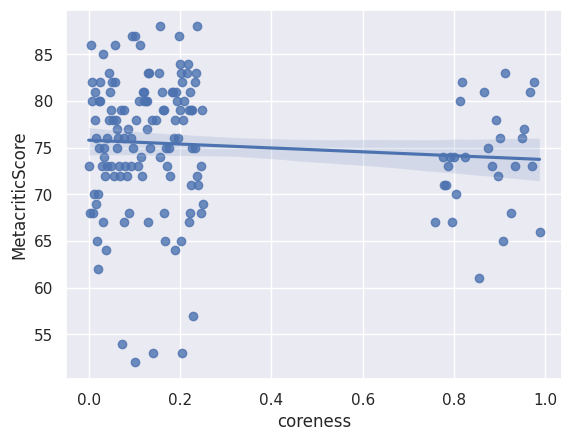

In [91]:
sns.regplot(x=df_nodes_Europa['coreness'], y=df_nodes_Europa['MetacriticScore']);

In [92]:
result_Europa= reg.linear(data=df_nodes_Europa, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')

In [93]:
result_Europa.micro_summary()

variable,coefficient,std error,p-value
coreness,-1.825696,1.885457,0.334431
ReleaseYear,0.333895,1.367333,0.807410
TotalRevenue,0.000000,0.000000,0.139145


In [94]:
df_nodes_Europe_periferia = df_nodes_Europa[df_nodes_Europa['coreness'] < threshold_coreness]
df_nodes_Europe_centro =  df_nodes_Europa[df_nodes_Europa['coreness'] > threshold_coreness]

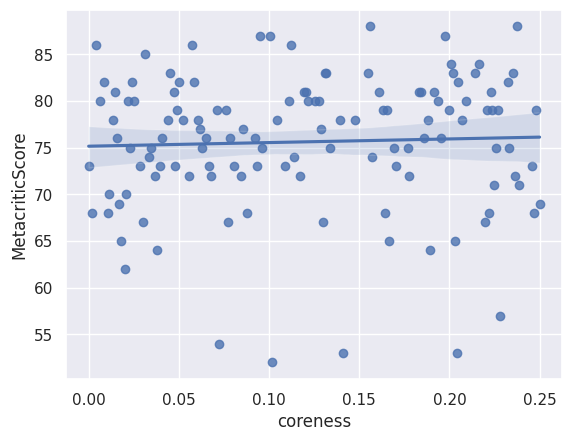

In [95]:
# ------- Para a periferia -------

sns.regplot(x=df_nodes_Europe_periferia['coreness'], y=df_nodes_Europe_periferia['MetacriticScore']);

In [96]:
result_periferia_Europa= reg.linear(data=df_nodes_Europe_periferia, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')
result_periferia_Europa.micro_summary()

variable,coefficient,std error,p-value
coreness,4.572948,8.468897,0.590194
ReleaseYear,0.755339,1.506894,0.617087
TotalRevenue,0.000000,0.000000,0.150018


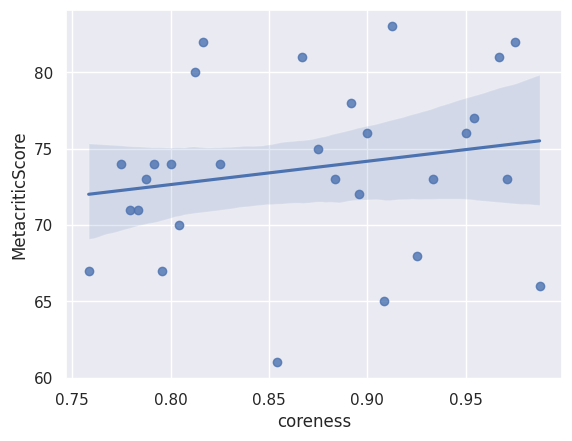

In [97]:
# ------- Para a centro -------

sns.regplot(x=df_nodes_Europe_centro['coreness'], y=df_nodes_Europe_centro['MetacriticScore']);

In [98]:
result_centro_Europa= reg.linear(data=df_nodes_Europe_centro, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')
result_centro_Europa.micro_summary()

variable,coefficient,std error,p-value
coreness,13.898181,15.289960,0.372044
ReleaseYear,-4.247098,3.495802,0.235749
TotalRevenue,-0.000000,0.000000,0.488839


#### Somente publishers da Europa + publishers da América do Norte

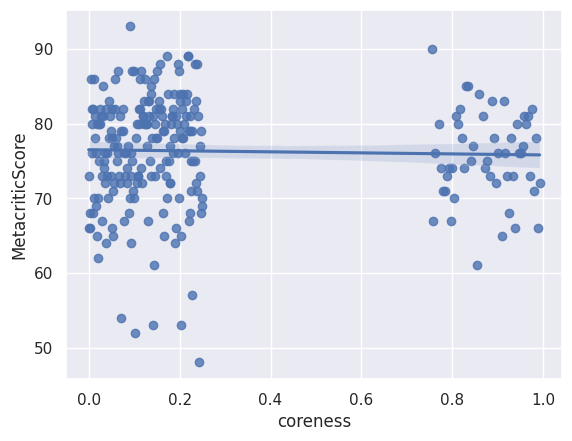

In [140]:
sns.regplot(x=df_nodes_Europa_e_America_Norte['coreness'], y=df_nodes_Europa_e_America_Norte['MetacriticScore']);

In [141]:
result_Europa_e_America_Norte = reg.linear(data=df_nodes_Europa_e_America_Norte, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')
result_Europa_e_America_Norte.micro_summary()

variable,coefficient,std error,p-value
coreness,-0.286394,1.453767,0.843989
ReleaseYear,0.898864,1.047216,0.391542
TotalRevenue,0.000000,0.000000,0.000833


#### Tudo exceto América do Norte

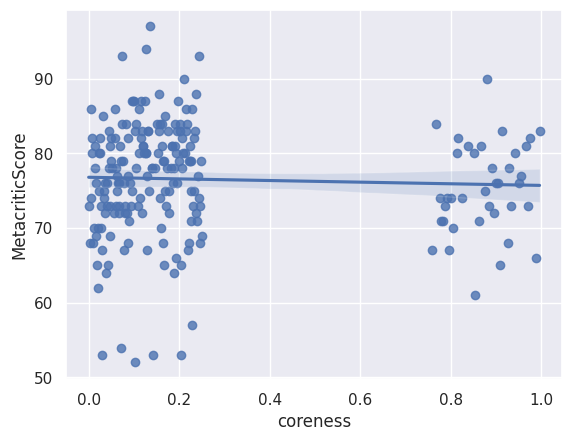

In [142]:
sns.regplot(x=df_nodes_TUDO_EXC_America_Norte['coreness'], y=df_nodes_TUDO_EXC_America_Norte['MetacriticScore']);

In [143]:
result_Tudo_EXC_America_Norte = reg.linear(data=df_nodes_TUDO_EXC_America_Norte, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')
result_Tudo_EXC_America_Norte.micro_summary()

variable,coefficient,std error,p-value
coreness,-1.066187,1.733927,0.539301
ReleaseYear,0.990723,1.226573,0.420185
TotalRevenue,0.000000,0.000000,0.000988


#### Tudo exceto Europa

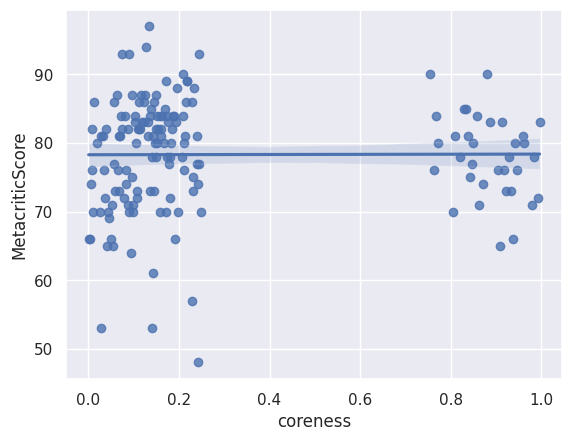

In [145]:
sns.regplot(x=df_nodes_TUDO_EXC_Europa['coreness'], y=df_nodes_TUDO_EXC_Europa['MetacriticScore']);

In [146]:
result_Tudo_EXC_Europa = reg.linear(data=df_nodes_TUDO_EXC_Europa, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')
result_Tudo_EXC_Europa.micro_summary()

variable,coefficient,std error,p-value
coreness,0.623543,1.993394,0.754855
ReleaseYear,1.784286,1.417314,0.209976
TotalRevenue,0.000000,0.000000,0.001852


#### Tudo exceto America do Norte e Europa

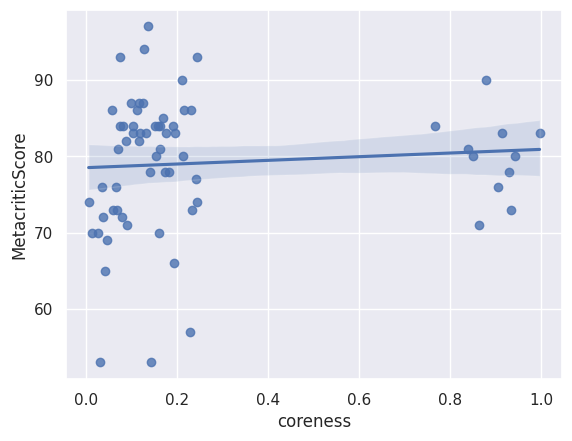

In [147]:
sns.regplot(x=df_nodes_TUDO_EXC_Europa_e_Norte['coreness'], y=df_nodes_TUDO_EXC_Europa_e_Norte['MetacriticScore']);

In [148]:
result_Tudo_EXC_Europa_e_Norte = reg.linear(data=df_nodes_TUDO_EXC_Europa_e_Norte, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')
result_Tudo_EXC_Europa_e_Norte.micro_summary()

variable,coefficient,std error,p-value
coreness,2.163400,3.718801,0.562881
ReleaseYear,1.889254,2.615238,0.472808
TotalRevenue,0.000000,0.000000,0.068439


#### Nada corroborou :c 

### Gráfico com limpeza aplicada

In [149]:
# ----- Algoritmo Reingold Fruchterm -----
g_limpo = gt_clean(g)
m_limpo = gt_draw.fruchterman_reingold_layout(g_limpo)
gt_move(g_limpo, m_limpo)
gt_save(g_limpo, 'projeto_frunch_limpo.net.gz')
r_limpo = netpixi.render('projeto_frunch_limpo.net.gz');

In [150]:
r_limpo.vertex_default(size = 1)